<a href="https://colab.research.google.com/github/srujanreddyj/Data_science_portfolio/blob/master/ISEN637_HW2_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirement already up-to-date: quantecon in /usr/local/lib/python3.6/dist-packages (0.4.6)


<Figure size 432x288 with 0 Axes>

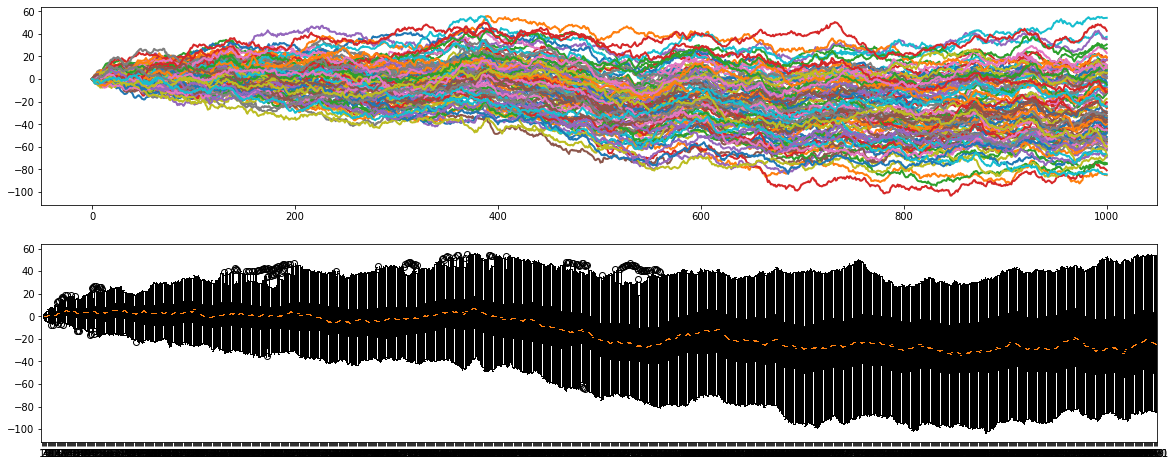

In [19]:
!pip install --upgrade quantecon

import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ


delta = 3
s = 1
rho = 0.1
beta = 0.9
T = 1000
num_sim = 100


#%%
# Formulate LQ problem 
A = [[1,1,0],
     [0,0,1],
     [0,0,0]]

B = [[0],
     [0],
     [1]]

C = [[-s],
     [0],
     [0]]

R = [[rho,0,0],
     [0,0,0],
     [0,0,0]]

Q=[1]

lq = LQ(Q, R, A, B=B, C=C, beta=beta)

#%%
x0 = (0,0,0)
xp, up, wp = lq.compute_sequence(x0, ts_length=T)

#%%

x_state = np.zeros(shape = (1, T+1))

x_state_all_sim = np.zeros(shape = (num_sim,T+1))

#%%
for j in range(num_sim):
    
    d = np.random.normal(0, s, T)

    for i in range(0,delta):
        x_state[0,i+1] = x_state[0,i] - d[i]

    for i in range(delta,T):
        x_state[0,i+1] = x_state[0,i] + up[0,i-delta+1] - d[i]
        
    x_state_all_sim[j,:] = x_state
#%%    
plt.figure(1)
plt.figure(figsize=(20,8))
plt.subplot(211)

time = np.linspace(0, T, T+1)

for k in range(0, num_sim):
    plt.plot(time, x_state_all_sim[k,:], lw=2)
    
plot_data = np.zeros(shape=(num_sim,T+1))

for j in range(0, T+1):
    plot_data[:,j] = np.transpose(x_state_all_sim[:,j])
    
plt.subplot(212)
plt.boxplot(plot_data)
plt.show()


In [14]:
print("P \n",lq.P,'\n \n',"F : ",lq.F)

P 
 [[0.47532199 0.37532199 0.28532199]
 [0.37532199 0.37532199 0.28532199]
 [0.28532199 0.28532199 0.28532199]] 
 
 F :  [[0.20432199 0.20432199 0.20432199]]


Question 1b: The optimal policy is as follows:


<Figure size 432x288 with 0 Axes>

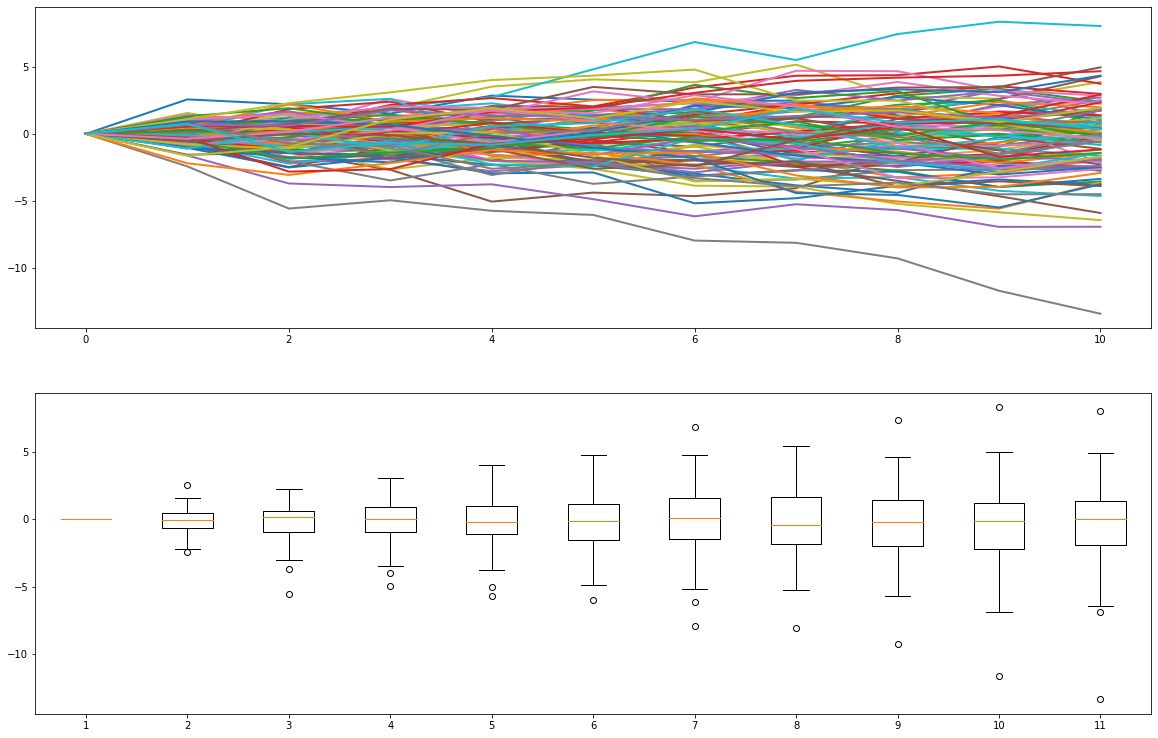

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ

# == Model parameters == #

delta = 3
s = 1
rho = 0.1
beta = 0.9
T = 10
num_sim = 100

# == Formulate LQ problem == #
Q = [1]
R = [rho]
A = [1]
B = [0]
C = [-s]

lq = LQ(Q, R, A, B, C=C, beta=beta)

# Running for time t <= delta-1
x0 = (0) # Initial Point

xp, up, wp = lq.compute_sequence(x0, ts_length=T)

x_final = xp[0, :]

# Runnning for time t > delta-1
#B_new = [1]
#x0 = x_final[delta]
#lq = LQ(Q, R, A, B=B_new, C=C, beta=beta)
#xp, up, wp = lq.compute_sequence(x0, ts_length=T-delta)
print('Question 1b: The optimal policy is as follows:')

x_state = np.zeros(shape = (1, T+1))

x_state_all_sim = np.zeros(shape = (num_sim,T+1))

for j in range(num_sim):
    
    d = np.random.normal(0, s, T)

    for i in range(0,delta):
        x_state[0,i+1] = x_state[0,i] - d[i]

    for i in range(delta,T):
        x_state[0,i+1] = x_state[0,i] + up[0,i-delta+1] - d[i]
        
    x_state_all_sim[j,:] = x_state
#%%    
plt.figure(1)
plt.figure(figsize=(20,13))
plt.subplot(211)

time = np.linspace(0, T, T+1)

for k in range(0, num_sim):
    plt.plot(time, x_state_all_sim[k,:], lw=2)
    
plot_data = np.zeros(shape=(num_sim,T+1))

for j in range(0, T+1):
    plot_data[:,j] = np.transpose(x_state_all_sim[:,j])
    
plt.subplot(212)
plt.boxplot(plot_data)
plt.show()


In [18]:
print("P \n",lq.P,'\n \n',"F : ",lq.F)

P 
 [[1.]] 
 
 F :  [[0.]]
